### Introduction


The dataset is collected and scrapped from Aqar website. The chosen cities are Riyadh, Jeddah, Dammam, and Al-Khobar. This dataset focused on the rental houses.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats

In [4]:
# Load the csv:
H_data = pd.read_csv('housing.csv')

In [5]:
H_data.head(5)

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...



#### - Dictionary

        - city: 
                city where house locate in
        - district:
                 district where house locate in
        - front:
                 What is the house front is north, west .. etc
        - size: 
                size in m^2
        - propertyage:
                 property age for the house 
        - bedrooms:
                 number of bedrooms 
        - bathrooms:
                 number of bathrooms 
        - livingrooms:
                 number of livingrooms 
        - kitchen:
                 show whether the house have a kitchen or not 
        - garage:
                 show whether the house have a garage or not 
        - driverroom:
                 show whether the house have a driverroom or not
        - maidroom:
                 show whether the house have a maid_room or not
        - furnished:
                 show whether the house is furnished or not
        - ac:  
                show whether the house have a ac or not
        - roof: 
                show whether the house have a space for roof on top or not
        - pool: 
                show whether the house have a pool or not
        - frontyard:
                 show whether the house have a frontyard or not
        - basement:
                 show whether the house have a basement or not
        - duplex:
                 show whether the house is a duplex or not
        - stairs: 
                show whether the house have a stairs or not
        - elevator:
                 show whether the house have an elevator or not
        - fireplace:
                 show whether the house have a fireplace or not
        - price: 
                show the price of the house
        - details: 
                shows any additional details from the house owner about the house


In [6]:
#Display the data types of each column 
print(H_data.dtypes)

Unnamed: 0       int64
city            object
district        object
front           object
size             int64
property_age     int64
bedrooms         int64
bathrooms        int64
livingrooms      int64
kitchen          int64
garage           int64
driver_room      int64
maid_room        int64
furnished        int64
ac               int64
roof             int64
pool             int64
frontyard        int64
basement         int64
duplex           int64
stairs           int64
elevator         int64
fireplace        int64
price            int64
details         object
dtype: object


In [7]:
# Display the null data each column 
H_data.isnull().sum()

Unnamed: 0       0
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         62
dtype: int64

In [8]:
housing = H_data

In [9]:
housing.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


In [10]:
# Number of offers per city
housing['city'].value_counts().to_frame()

,city
الخبر,778
الرياض,770
الدمام,722
جدة,704


In [11]:
# Number of offers per city and distric
repeat_district =housing.groupby(['city'])['district'].value_counts().to_frame()
repeat_district.head()

district
city   district                      
 الخبر    حي اللؤلؤ               120
          حي التحلية              117
          حي الصواري              112
          حي الكورنيش              82
          حي الحزام الاخضر         75

In [12]:
# mean area for all district

housing.groupby(['city', 'district'])['size'].mean().to_frame()

size
city   district                   
 الخبر    حي الامواج    436.190476
          حي البحيرة    373.170732
          حي التحلية    419.760684
          حي الثقبة     325.000000
          حي الجسر      450.000000
...                            ...
 جدة      حي الياقوت    274.147541
          حي ام حبلين   220.000000
          حي بريمان     350.000000
          حي طيبة       471.366667
          حي مشرفة      437.000000

[198 rows x 1 columns]

In [13]:
#describe of the data on the size
houasing_size = housing.groupby('city')['size'].describe()

<AxesSubplot:xlabel='city', ylabel='size'>

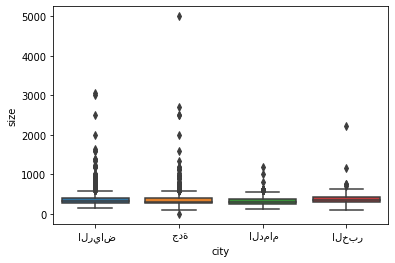

In [14]:
sns.boxplot(x="city", y="size", data=housing)

<AxesSubplot:xlabel='city', ylabel='property_age'>

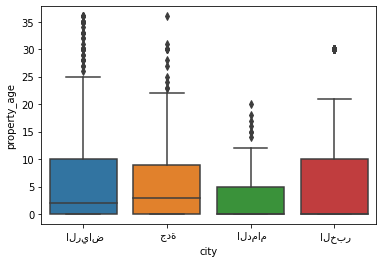

In [15]:

sns.boxplot(x="city", y="property_age", data=housing)

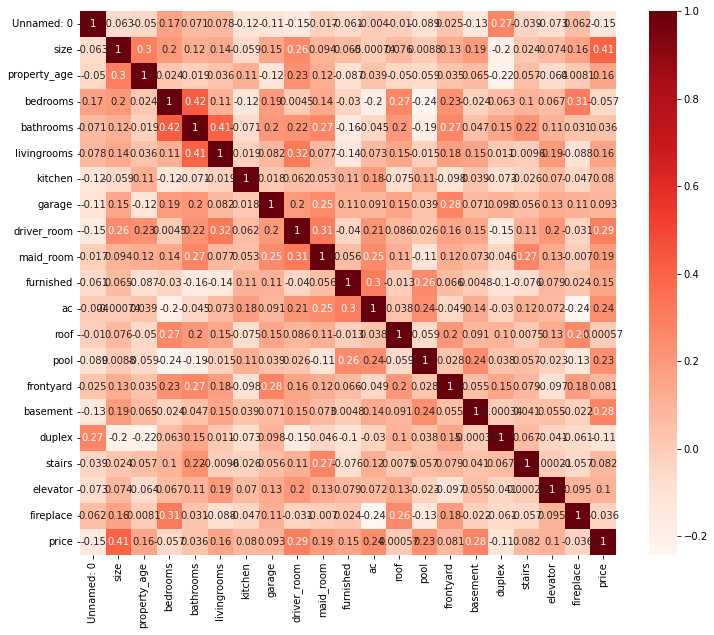

In [16]:
#Correlation between features
plt.figure(figsize=(12,10))
cor = housing.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show(); 

In [32]:
def fixTypes(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('دور') != -1 or details.find('دور') != -1 ):
        rent = 'floor'
    elif( details.find('شقه') != -1):
        rent = 'apartment'
    elif( details.find('فله') != -1 or details.find('فلة') != -1 or details.find('فيلا') != -1 or details.find('دبلكس') != -1 or details.find('دوبلكس') != -1 or 
        details.find('بيت') != -1 or details.find('ڤيلا') != -1 or details.find('فلل') != -1 or details.find('دبلوكسين') != -1 or details.find('فلا') != -1
        or details.find('فيلا ') != -1 or details.find('دبلوكس ') != -1):  
        rent = 'house'
    else:
        rent = 'Unkown'
        
    return rent

housing.loc[:,'Accommodation types'] = housing.loc[:,'details'].apply(fixTypes)

In [33]:
housing.head(10)

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Accommodation types
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,house
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,floor
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,floor
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...,house
5,175,الرياض,حي الروضة,شرق,900,15,4,4,2,1,...,0,1,0,0,1,0,1,150000,فيلا للايجار بحي الروضه \nمجلس وصاله ومقلط ومط...,floor
6,158,الرياض,حي المصيف,غرب,500,10,5,5,5,1,...,0,1,1,0,1,1,0,150000,فيلا بحي المصيف للايجار \nخمس اجنحة وقبو مجالس...,house
7,993,جدة,حي البساتين,شرق,300,7,3,4,3,1,...,1,1,0,1,1,0,0,115000,فيلا فاخرة للايجار مؤثثة بالكامل حي البساتين ...,floor
8,1922,الدمام,حي الشعلة,غرب,345,4,5,5,2,1,...,0,1,0,1,0,0,0,60000,للايجار \nدبلكس منفصل في حي الرحاب الدمام\nمعل...,floor
9,3217,الخبر,حي المدينة الرياضية,جنوب غربي,200,7,5,4,1,1,...,0,0,0,0,1,0,0,43000,شقه دوبلكس تتكون من 2 طابق مدخل خاص \nبالراكه ...,floor


In [37]:
housing.groupby(['Accommodation types']).size()

Accommodation types
Unkown        242
apartment       6
floor        1861
house         865
dtype: int64

In [20]:
housing_group = housing.groupby(['city', 'district','Accommodation types'])['size'].mean().to_frame()

In [34]:
housing_group.head(10)

size
city   district       Accommodation types            
 الخبر    حي الامواج  floor                436.575000
                      اhouse               428.500000
          حي البحيرة  floor                300.000000
                      اhouse               375.000000
          حي التحلية  Unkown               205.000000
                      floor                425.132743
                      اhouse               289.000000
          حي الثقبة   floor                325.000000
          حي الجسر    Unkown               500.000000
                      floor                400.000000

### Let's first get 'floor' data

In [22]:
d_floor = housing[housing['Accommodation types'] == 'floor']

In [23]:
d_floor.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Accommodation types
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,floor
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,floor
5,175,الرياض,حي الروضة,شرق,900,15,4,4,2,1,...,0,1,0,0,1,0,1,150000,فيلا للايجار بحي الروضه \nمجلس وصاله ومقلط ومط...,floor
7,993,جدة,حي البساتين,شرق,300,7,3,4,3,1,...,1,1,0,1,1,0,0,115000,فيلا فاخرة للايجار مؤثثة بالكامل حي البساتين ...,floor
8,1922,الدمام,حي الشعلة,غرب,345,4,5,5,2,1,...,0,1,0,1,0,0,0,60000,للايجار \nدبلكس منفصل في حي الرحاب الدمام\nمعل...,floor


(0.0, 1364945.0)

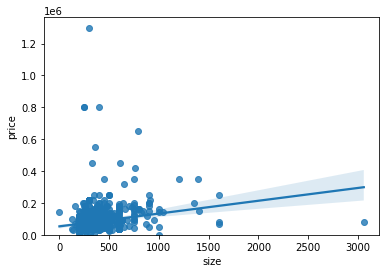

In [35]:
# Engine size as potential predictor variable of price
sns.regplot(x="size", y="price", data=d_floor)
plt.ylim(0,)

In [36]:
# #Correlation between size and price 
d_floor[["size", "price"]].corr()

,size,price
size,1.000000,0.192309
price,0.192309,1.000000


(0.0, 1364945.0)

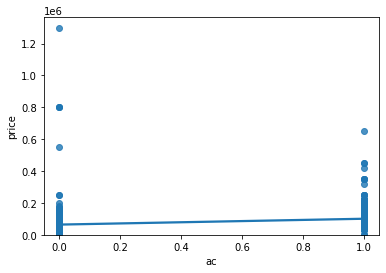

In [26]:
# Engine size as potential predictor variable of price
sns.regplot(x="ac", y="price", data=d_floor)
plt.ylim(0,)

In [27]:
# #Correlation between size and price 
d_floor[["ac", "price"]].corr()

,ac,price
ac,1.000000,0.290579
price,0.290579,1.000000


<AxesSubplot:xlabel='Accommodation types', ylabel='price'>

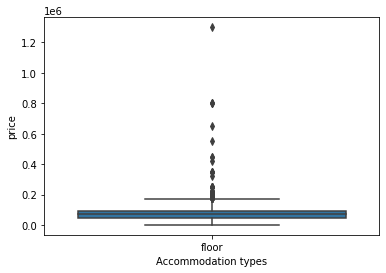

In [28]:
sns.boxplot(x="Accommodation types", y="price", data=d_floor)

In [29]:
pearson_coef, p_value = stats.pearsonr(d_floor['size'], d_floor['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)   

The Pearson Correlation Coefficient is 0.1923089542022964  with a P-value of P =  5.824198994379466e-17


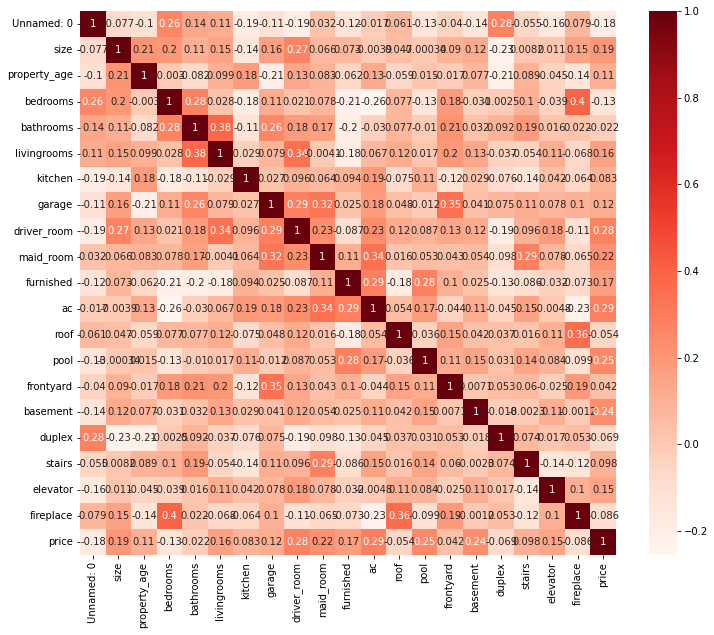

In [30]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = d_floor.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show(); 

In [31]:
# the feature other than price that is most correlated with price.
d_floor.corr()['price'].sort_values()

Unnamed: 0     -0.181332
bedrooms       -0.127939
fireplace      -0.086013
duplex         -0.069236
roof           -0.054480
bathrooms      -0.021574
frontyard       0.042370
kitchen         0.083111
stairs          0.098430
property_age    0.105246
garage          0.116576
elevator        0.146291
livingrooms     0.159134
furnished       0.168334
size            0.192309
maid_room       0.215694
basement        0.236925
pool            0.250380
driver_room     0.277348
ac              0.290579
price           1.000000
Name: price, dtype: float64